# About

This notebook shows the solution of the neutral atom diffusion model in high temperature plasmas, especially there are two kinds of isotopes in plasmas, such as hydrogen and deuterium plasmas.

## Synthetic plasma

We demonstrates how the deuterium and hydrogen behaves in deuterium-hydrogen mixed plasmas.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import neutral_diffusion

In [2]:
# simplified atomic rate coefficients
coef_ion = 1.0e-14  # ionization rate coefficient [m3/s]
coef_cx = 1.0e-14  # ionization rate coefficient [m3/s]
mH = 1.6726219e-27  # hydrogen mass [kg]
mD = mH * 2  # deuterium mass

In [3]:
# radial coordinate
r = np.linspace(0, 1.0, 81)

In [4]:
# plasma 1 (lower density)
ne = 2.0e19 * (1 - r**10.0) + 1e17 # [m^-3]
ti = 1.0e3 * (1 - r**2.0) + 3.0 # [eV]
nHion = ne * 0.3  # hydrogen ion density in the plasma [m^-3]
nDion = ne * 0.7  # deuterium ion density

## Solutions of the diffusion model

In [5]:
model = neutral_diffusion.model1d.Cylindrical_mixed(r, mH, mD)

In [6]:
nH, nD, tH, tD, _ = model.solve(coef_ion * ne, coef_cx * nHion, coef_cx * nDion, ti, 
                                t1_edge=3, t2_edge=3, n1_edge=1.0, n2_edge=1.0)

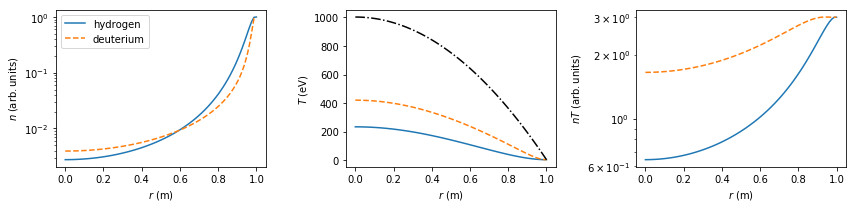

In [7]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.plot(r, nH, label='hydrogen')
plt.plot(r, nD, '--', label='deuterium')
plt.yscale('log')
plt.xlabel('$r$ (m)')
plt.ylabel('$n \;\mathrm{(arb. units)}$')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(r, tH, label='hydrogen')
plt.plot(r, tD, '--', label='deuterium')
plt.plot(r, ti, '-.k')
plt.xlabel('$r$ (m)')
plt.ylabel('$T \;\mathrm{(eV)}$')

plt.subplot(1, 3, 3)
plt.plot(r, nH * tH, label='hydrogen')
plt.plot(r, nD * tD, '--', label='deuterium')
plt.xlabel('$r$ (m)')
plt.ylabel('$n T \;\mathrm{(arb. units)}$')
plt.yscale('log')

plt.tight_layout()

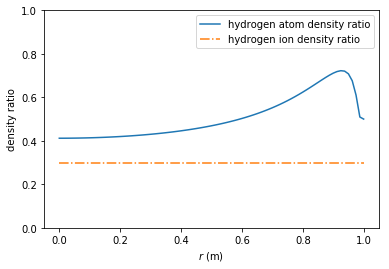

In [8]:
plt.plot(r, nH / (nD + nH), label='hydrogen atom density ratio')
plt.plot(r, nHion / (nDion + nHion), '-.', label='hydrogen ion density ratio')
plt.xlabel('$r$ (m)')
plt.ylabel('density ratio')
plt.ylim(0, 1)
plt.legend()